In [9]:
import cv2
import numpy as np
import os
import pprint
import cv2
import matplotlib.pyplot as plt
import warnings
from itertools import chain
from os import path
from time import time
from os import path

In [10]:
#tab_jpeg

# table K1 - Luminance quantize Matrix  
K1 = np.zeros((8, 8))
K1[0] = [ 16,  11,  10,  16,  24,  40,  51,  61]
K1[1] = [ 12,  12,  14,  19,  26,  58,  60,  55]
K1[2] = [ 14,  13,  16,  24,  40,  57,  69,  56]
K1[3] = [ 14,  17,  22,  29,  51,  87,  80,  62]
K1[4] = [ 18,  22,  37,  56,  68, 109, 103,  77]
K1[5] = [ 24,  35,  55,  64,  81, 104, 113,  92]
K1[6] = [ 49,  64,  78,  87, 103, 121, 120, 101]
K1[7] = [ 72,  92,  95,  98, 112, 100, 103,  99]

# Table K3 
# Table for luminance DC coefficient differences
K3 = dict()
K3[0] = "00"
K3[1] = "010"
K3[2] = "011"
K3[3] = "100"
K3[4] = "101"
K3[5] = "110"
K3[6] = "1110"
K3[7] = "11110"
K3[8] = "111110"
K3[9] = "1111110"
K3[10] = "11111110"
K3[11] = "111111110"

# Table K5 
# Table for luminance AC coefficients
K5 = dict()
K5[(0, 0)] = "1010"
K5[(0, 1)] = "00"
K5[(0, 2)] = "01"
K5[(0, 3)] = "100"
K5[(0, 4)] = "1011"
K5[(0, 5)] = "11010"
K5[(0, 6)] = "1111000"
K5[(0, 7)] = "11111000"
K5[(0, 8)] = "1111110110"
K5[(0, 9)] = "1111111110000010"
K5[(0,10)] = "1111111110000011"

K5[(1, 1)] = "1100"
K5[(1, 2)] = "11011"
K5[(1, 3)] = "1111001"
K5[(1, 4)] = "111110110"
K5[(1, 5)] = "11111110110"
K5[(1, 6)] = "1111111110000100"
K5[(1, 7)] = "1111111110000101"
K5[(1, 8)] = "1111111110000110"
K5[(1, 9)] = "1111111110000111"
K5[(1,10)] = "1111111110001000"

K5[(2, 1)] = "11100"
K5[(2, 2)] = "11111001"
K5[(2, 3)] = "1111110111"
K5[(2, 4)] = "111111110100"
K5[(2, 5)] = "1111111110001001"
K5[(2, 6)] = "1111111110001010"
K5[(2, 7)] = "1111111110001011"
K5[(2, 8)] = "1111111110001100"
K5[(2, 9)] = "1111111110001101"
K5[(2,10)] = "1111111110001110"

K5[(3, 1)] = "111010"
K5[(3, 2)] = "111110111"
K5[(3, 3)] = "111111110101"
K5[(3, 4)] = "1111111110001111"
K5[(3, 5)] = "1111111110010000"
K5[(3, 6)] = "1111111110010001"
K5[(3, 7)] = "1111111110010010"
K5[(3, 8)] = "1111111110010011"
K5[(3, 9)] = "1111111110010100"
K5[(3,10)] = "1111111110010101"

K5[(4, 1)] = "111011"
K5[(4, 2)] = "1111111000"
K5[(4, 3)] = "1111111110010110"
K5[(4, 4)] = "1111111110010111"
K5[(4, 5)] = "1111111110011000"
K5[(4, 6)] = "1111111110011001"
K5[(4, 7)] = "1111111110011010"
K5[(4, 8)] = "1111111110011011"
K5[(4, 9)] = "1111111110011100"
K5[(4,10)] = "1111111110011101"

K5[(5, 1)] = "1111010"
K5[(5, 2)] = "11111110111"
K5[(5, 3)] = "1111111110011110"
K5[(5, 4)] = "1111111110011111"
K5[(5, 5)] = "1111111110100000"
K5[(5, 6)] = "1111111110100001"
K5[(5, 7)] = "1111111110100010"
K5[(5, 8)] = "1111111110100011"
K5[(5, 9)] = "1111111110100100"
K5[(5,10)] = "1111111110100101"

K5[(6, 1)] = "1111011"
K5[(6, 2)] = "111111110110"
K5[(6, 3)] = "1111111110100110"
K5[(6, 4)] = "1111111110100111"
K5[(6, 5)] = "1111111110101000"
K5[(6, 6)] = "1111111110101001"
K5[(6, 7)] = "1111111110101010"
K5[(6, 8)] = "1111111110101011"
K5[(6, 9)] = "1111111110101100"
K5[(6,10)] = "1111111110101101"

K5[(7, 1)] = "11111010"
K5[(7, 2)] = "111111110111"
K5[(7, 3)] = "1111111110101110"
K5[(7, 4)] = "1111111110101111"
K5[(7, 5)] = "1111111110110000"
K5[(7, 6)] = "1111111110110001"
K5[(7, 7)] = "1111111110110010"
K5[(7, 8)] = "1111111110110011"
K5[(7, 9)] = "1111111110110100"
K5[(7,10)] = "1111111110110101"

K5[(8, 1)] = "111111000"
K5[(8, 2)] = "111111111000000"
K5[(8, 3)] = "1111111110110110"
K5[(8, 4)] = "1111111110110111"
K5[(8, 5)] = "1111111110111000"
K5[(8, 6)] = "1111111110111001"
K5[(8, 7)] = "1111111110111010"
K5[(8, 8)] = "1111111110111011"
K5[(8, 9)] = "1111111110111100"
K5[(8,10)] = "1111111110111101"

K5[(9, 1)] = "111111001"
K5[(9, 2)] = "1111111110111110"
K5[(9, 3)] = "1111111110111111"
K5[(9, 4)] = "1111111111000000"
K5[(9, 5)] = "1111111111000001"
K5[(9, 6)] = "1111111111000010"
K5[(9, 7)] = "1111111111000011"
K5[(9, 8)] = "1111111111000100"
K5[(9, 9)] = "1111111111000101"
K5[(9,10)] = "1111111111000110"

K5[(10, 1)] = "111111010"
K5[(10, 2)] = "1111111111000111"
K5[(10, 3)] = "1111111111001000"
K5[(10, 4)] = "1111111111001001"
K5[(10, 5)] = "1111111111001010"
K5[(10, 6)] = "1111111111001011"
K5[(10, 7)] = "1111111111001100"
K5[(10, 8)] = "1111111111001101"
K5[(10, 9)] = "1111111111001110"
K5[(10,10)] = "1111111111001111"

K5[(11, 1)] = "1111111001"
K5[(11, 2)] = "1111111111010000"
K5[(11, 3)] = "1111111111010001"
K5[(11, 4)] = "1111111111010010"
K5[(11, 5)] = "1111111111010011"
K5[(11, 6)] = "1111111111010100"
K5[(11, 7)] = "1111111111010101"
K5[(11, 8)] = "1111111111010110"
K5[(11, 9)] = "1111111111010111"
K5[(11,10)] = "1111111111011000"

K5[(12, 1)] = "1111111010"
K5[(12, 2)] = "1111111111011001"
K5[(12, 3)] = "1111111111011010"
K5[(12, 4)] = "1111111111011011"
K5[(12, 5)] = "1111111111011100"
K5[(12, 6)] = "1111111111011101"
K5[(12, 7)] = "1111111111011110"
K5[(12, 8)] = "1111111111011111"
K5[(12, 9)] = "1111111111100000"
K5[(12,10)] = "1111111111100001"

K5[(13, 1)] = "11111111000"
K5[(13, 2)] = "1111111111100010"
K5[(13, 3)] = "1111111111100011"
K5[(13, 4)] = "1111111111100100"
K5[(13, 5)] = "1111111111100101"
K5[(13, 6)] = "1111111111100110"
K5[(13, 7)] = "1111111111100111"
K5[(13, 8)] = "1111111111101000"
K5[(13, 9)] = "1111111111101001"
K5[(13,10)] = "1111111111101010"

K5[(14, 1)] = "1111111111101011"
K5[(14, 2)] = "1111111111101100"
K5[(14, 3)] = "1111111111101101"
K5[(14, 4)] = "1111111111101110"
K5[(14, 5)] = "1111111111101111"
K5[(14, 6)] = "1111111111110000"
K5[(14, 7)] = "1111111111110001"
K5[(14, 8)] = "1111111111110010"
K5[(14, 9)] = "1111111111110011"
K5[(14,10)] = "1111111111110100"

K5[(15, 0)] = "11111111001"
K5[(15, 1)] = "1111111111110101"
K5[(15, 2)] = "1111111111110110"
K5[(15, 3)] = "1111111111110111"
K5[(15, 4)] = "1111111111111000"
K5[(15, 5)] = "1111111111111001"
K5[(15, 6)] = "1111111111111010"
K5[(15, 7)] = "1111111111111011"
K5[(15, 8)] = "1111111111111100"
K5[(15, 9)] = "1111111111111101"
K5[(15,10)] = "1111111111111110"

# zig-zag order
zigzag = np.zeros((8, 8))
zigzag[0] = [ 0,  1,  5,  6, 14, 15, 27, 28]
zigzag[1] = [ 2,  4,  7, 13, 16, 26, 29, 42]
zigzag[2] = [ 3,  8, 12, 17, 25, 30, 41, 43]
zigzag[3] = [ 9, 11, 18, 24, 31, 40, 44, 53]
zigzag[4] = [10, 19, 23, 32, 39, 45, 52, 54]
zigzag[5] = [20, 22, 33, 38, 46, 51, 55, 60]
zigzag[6] = [21, 34, 37, 47, 50, 56, 59, 61]
zigzag[7] = [35, 36, 48, 49, 57, 58, 62, 63]
#índice para ordenar valores de array 1D em zigzag
ind_O = zigzag.reshape((64),order='F').astype('int')
#índice para repor ordem original de array 1D em zigzag
ind_Z = np.argsort(ind_O)


#Exemplo:
#np.random.seed(1)
#D1=np.random.randint(-10,10,size=(8,8))
#print(D1)
#D1Flat=D1.flatten(order='F')
#print(D1Flat)
#D1zz=D1Flat[ind_Z]
#print(D1zz)
#D2=D1zz[ind_O].reshape((8,8),order='F')
#print(D2)

##########################################################################
#
#   Function to calculate de quality factor
#
##########################################################################

def quality_factor(q):
    if(q <= 50):
        factor = 50.0 / q
    else:
        factor = 2.0 - (q * 2.0)/100.0
    return factor 

In [11]:
def get_submatriz( matriz, line, col, dim):
     return matriz[line: line + dim, col : col + dim]

def aplicar_submatriz(matriz, submatriz, line, col, dim):
    matriz[line: line + dim, col : col + dim] = submatriz
    return matriz

def redimensionarMatriz(matriz, factor_mod):
    
    line_dim, col_dim = matriz.shape

    paddingLines = line_dim % factor_mod
    paddingCols = col_dim % factor_mod

    for i in range(paddingLines):
        matriz = np.delete(matriz, line_dim - 1, 0)
        line_dim -= 1

    for i in range(paddingCols):
        matriz = np.delete(matriz, col_dim - 1 , 1)
        col_dim -= 1
        
    return matriz

    
def codificador_dct(submatriz):
      
    submatriz = cv2.dct(submatriz)
           
    return submatriz
    
    
def descodificador_dct(submatriz):
    
    submatriz = cv2.idct(submatriz)
            
    return submatriz


def codificacaoJPEG(imagem):
    
    m_size = 8
    imagem = redimensionarMatriz(imagem, m_size)
    imagem = imagem * 1.0
    line_dim, col_dim = image.shape
    for line in range(int(line_dim/m_size)):
        for col in range(int(col_dim/m_size)):
            submatriz = get_submatriz(imagem, line * m_size, col * m_size, m_size)
            return submatriz
  

In [28]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

def getSize(amplitude: int, positive: bool) -> (int, int):
    return amplitude, len("{0:b}".format(np.abs(amplitude)))  

def writeACAsInteger(submatrix: np.array) -> (dict):
    ACIntegerTable = dict()
    countzeros = 0
    for i in range(1, len(submatriz) - 1):
        if submatriz[i] == 0:
            countzeros += 1
        elif submatriz[i] > 0:
            size, amplitude = getSize(submatriz[i], True)
            ACIntegerTable[i] = [(countzeros, amplitude), size]
            countzeros = 0
        elif submatriz[i] < 0:
            size, amplitude = getSize(submatriz[i], False)
            ACIntegerTable[i] = [(countzeros, amplitude), size]
            countzeros = 0
        ACIntegerTable[len(submatriz) - 1] = [(0, 0), 0]
    return ACIntegerTable

def writeACInBinary(submatrix: np.array) -> (str):   
    ACBinaryString = ""
    countzeros = 0
    for i in range(1, len(submatriz) - 1):
        if submatriz[i] == 0:
            countzeros += 1
        elif submatriz[i] > 0:
            size, amplitude = getSize(submatriz[i], True)
            valueK5 = K5[(countzeros, amplitude)]
            binaryAmplitude = "0" + "{0:b}".format(np.abs(size))
            ACBinaryString += valueK5 + binaryAmplitude
            countzeros = 0
        elif submatriz[i] < 0:
            size, amplitude = getSize(submatriz[i], True)
            valueK5 = K5[(countzeros, amplitude)]
            binaryAmplitude = "1" + "{0:b}".format(np.abs(size))
            ACBinaryString += valueK5 + binaryAmplitude
            countzeros = 0
    ACBinaryString += "000"  
    return ACBinaryString

def reverseACFromBitstream(bitstream: str, dc_value: int) -> (): 

    dimensions = [len(v) for v in K5.values()] 
    dict_values = list(K5.values())
    dict_keys = list(K5.keys())
    min_size = min(map(len, dict_values))
    len_dict_values = len(dict_values)
    decoded = np.zeros(64)
    decoded[0] = dc_value
    i = 0
    j = 1
    decodedIndex = 1
    while(len(bitstream) > 0):
        i +=1
        if(i in dimensions):
            for v in range(len_dict_values):
                if(len(bitstream[:i]) == len(dict_values[v])):
                    if(bitstream[:i] == dict_values[v]):
                        zero_run_length = dict_keys[v][0]
                        if(zero_run_length != 0):
                            for z in range(zero_run_length):
                                decoded[decodedIndex] = 0
                                decodedIndex += 1
                        nrbits = dict_keys[v][1] + 1 #mais bit de sinal
                        binaryString = bitstream[i : i + nrbits]
                        if binaryString[0] != "0":
                            backToInt = convertBackToInt(binaryString, False)
                        else:
                            backToInt = convertBackToInt(binaryString, True)
                        decoded[decodedIndex] = backToInt
                        bitstream = bitstream[i + nrbits:]
                        j += 1
                        i = min_size-1
                        decodedIndex +=1
                        break
    return decoded.astype(int)
    
def convertBackToInt(binary: str, positive: bool = True) -> (int):
    if binary != "0":
        binary = binary[1:]
        backToInt = int(binary, 2)
        if not positive:
            backToInt *= -1
        return backToInt
    else:
        return 0

In [27]:
"""
import pprint
pp = pprint.PrettyPrinter(indent=4)

def getSize(amplitude: int, positive: bool) -> (int, int):
    return amplitude, len("{0:b}".format(np.abs(amplitude)))  

def writeACAsInteger(submatrix: np.array) -> (dict):
    ACIntegerTable = dict()
    countzeros = 0
    for i in range(1, len(submatriz) - 1):
        if submatriz[i] == 0:
            countzeros += 1
        elif submatriz[i] > 0:
            size, amplitude = getSize(submatriz[i], True)
            ACIntegerTable[i] = [(countzeros, amplitude), size]
            countzeros = 0
        elif submatriz[i] < 0:
            size, amplitude = getSize(submatriz[i], False)
            ACIntegerTable[i] = [(countzeros, amplitude), size]
            countzeros = 0
        ACIntegerTable[len(submatriz) - 1] = [(0, 0), 0]
    return ACIntegerTable

def writeACInBinary(submatrix: np.array) -> (str):   
    ACBinaryString = ""
    countzeros = 0
    for i in range(1, len(submatriz) - 1):
        if submatriz[i] == 0:
            countzeros += 1
        elif submatriz[i] > 0:
            size, amplitude = getSize(submatriz[i], True)
            valueK5 = K5[(countzeros, amplitude)]
            binaryAmplitude = "0" + "{0:b}".format(np.abs(size))
            ACBinaryString += valueK5 + binaryAmplitude
            countzeros = 0
        elif submatriz[i] < 0:
            size, amplitude = getSize(submatriz[i], True)
            valueK5 = K5[(countzeros, amplitude)]
            binaryAmplitude = "1" + "{0:b}".format(np.abs(size))
            ACBinaryString += valueK5 + binaryAmplitude
            countzeros = 0
    ACBinaryString += "000"  
    return ACBinaryString

def reverseACFromBitstream(bitstream: str, dc_value: int) -> (): 

    dimensions = [len(v) for v in K5.values()] 
    print("DIMENSIONS")
    print(dimensions)
    print("\n")
    
    dict_values = list(K5.values())
    print("DICT VALUES")
    print(dict_values)
    print("\n")
    
    dict_keys = list(K5.keys())
    print("DICT KEYS")
    print(dict_keys)
    print("\n")
    
    min_size = min(map(len, dict_values))
    print("min_size")
    print(min_size)
    print("\n")
    len_dict_values = len(dict_values)
    decoded = np.zeros(64)
    decoded[0] = dc_value
    i = 0
    j = 1
    decodedIndex = 1
    while(len(bitstream) > 0):
        i +=1
        if(i in dimensions):
            for v in range(len_dict_values):
                if(len(bitstream[:i]) == len(dict_values[v])):
                    print("Comparing...")
                    print(bitstream[:i])
                    print("... to...")
                    print(dict_values[v])

                    if(bitstream[:i] == dict_values[v]):
                        zero_run_length = dict_keys[v][0]
                        if(zero_run_length != 0):
                            for z in range(zero_run_length):
                                decoded[decodedIndex] = 0
                                decodedIndex += 1
                            print("ADDED " + str(zero_run_length) + " ZEROS")
                            print(decoded)

                        nrbits = dict_keys[v][1] + 1 #mais bit de sinal
                        print("index position")
                        print(i)
                        print("nrbits to read next...")
                        print(nrbits)
                        binaryString = bitstream[i : i + nrbits]
                        print("value being analysed...")
                        print(binaryString)
                        if binaryString[0] != "0":
                            backToInt = convertBackToInt(binaryString, False)
                        else:
                            backToInt = convertBackToInt(binaryString, True)
                        print("resulting integer...")
                        print(backToInt)
                        decoded[decodedIndex] = backToInt
                        print(decoded)
                        print("::::")
                        print(bitstream)
                        bitstream = bitstream[i + nrbits:]
                        print("::::")
                        print(bitstream)
                        j += 1
                        i = min_size-1
                        decodedIndex +=1
                        break
    return decoded.astype(int)
    
def convertBackToInt(binary: str, positive: bool = True) -> (int):
    if binary != "0":
        binary = binary[1:]
        backToInt = int(binary, 2)
        if not positive:
            backToInt *= -1
        return backToInt
    else:
        return 0
"""

'\nimport pprint\npp = pprint.PrettyPrinter(indent=4)\n\ndef getSize(amplitude: int, positive: bool) -> (int, int):\n    return amplitude, len("{0:b}".format(np.abs(amplitude)))  \n\ndef writeACAsInteger(submatrix: np.array) -> (dict):\n    ACIntegerTable = dict()\n    countzeros = 0\n    for i in range(1, len(submatriz) - 1):\n        if submatriz[i] == 0:\n            countzeros += 1\n        elif submatriz[i] > 0:\n            size, amplitude = getSize(submatriz[i], True)\n            ACIntegerTable[i] = [(countzeros, amplitude), size]\n            countzeros = 0\n        elif submatriz[i] < 0:\n            size, amplitude = getSize(submatriz[i], False)\n            ACIntegerTable[i] = [(countzeros, amplitude), size]\n            countzeros = 0\n        ACIntegerTable[len(submatriz) - 1] = [(0, 0), 0]\n    return ACIntegerTable\n\ndef writeACInBinary(submatrix: np.array) -> (str):   \n    ACBinaryString = ""\n    countzeros = 0\n    for i in range(1, len(submatriz) - 1):\n        if

In [29]:
"""
print("Imagem ANTES de ser aplicada a DCT bidimensional:")
input_file = "lenac.tif"
plt.figure(figsize=(5,5))
image = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)*1.0
plt.imshow(image, cmap='gray')
plt.show()

#Aplicar Bloco final a imagem construindo a imagem comprimida
submatriz = codificacaoJPEG(image).astype("int")
"""

submatriz = np.array([
                        [ 84,  5, -3,  1,  3, -1,  1,  0],
                        [ -3, -2,  1,  2,  1,  0,  0,  0],
                        [ -1, -1,  1,  1,  1,  0,  0,  0],
                        [ -1,  0,  0,  1,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0] ])


print("ORIGINAL SUBMATRIZ")
print(submatriz)
print("\n")
submatriz = submatriz.flatten(order='F')
submatriz = submatriz[ind_Z]
print("ZIGZAG SUBMATRIZ FLATTEN")
print(submatriz)
print("\n")

print("______________________________________________________")

print("AC IN INTEGER")
ac_integer = writeACAsInteger(submatriz)
pp.pprint(ac_integer)
print("\n")

print("______________________________________________________")

print("AC AS BITSTREAM")
ac_binary = writeACInBinary(submatriz)
print(ac_binary)
print("\n")

print("______________________________________________________")

print("AC DECODED FORMAT")
ac_matrix = reverseACFromBitstream(ac_binary, 50)
print(ac_matrix)
print("\n")
ac_matrix = ac_matrix[ind_O].reshape((8,8),order='F')
print(ac_matrix)
print("\n")

print("ORIGINAL SUBMATRIZ")
submatriz = submatriz[ind_O].reshape((8,8),order='F')
print(submatriz)
print("\n")


ORIGINAL SUBMATRIZ
[[84  5 -3  1  3 -1  1  0]
 [-3 -2  1  2  1  0  0  0]
 [-1 -1  1  1  1  0  0  0]
 [-1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


ZIGZAG SUBMATRIZ FLATTEN
[84  5 -3 -1 -2 -3  1  1 -1 -1  0  0  1  2  3 -1  1  1  0  0  0  0  0  0
  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


______________________________________________________
AC IN INTEGER
{   1: [(0, 3), 5],
    2: [(0, 2), -3],
    3: [(0, 1), -1],
    4: [(0, 2), -2],
    5: [(0, 2), -3],
    6: [(0, 1), 1],
    7: [(0, 1), 1],
    8: [(0, 1), -1],
    9: [(0, 1), -1],
    12: [(2, 1), 1],
    13: [(0, 2), 2],
    14: [(0, 2), 3],
    15: [(0, 1), -1],
    16: [(0, 1), 1],
    17: [(0, 1), 1],
    24: [(6, 1), 1],
    25: [(0, 1), 1],
    27: [(1, 1), 1],
    63: [(0, 0), 0]}


______________________________________________________
AC AS BITSTREAM


In [268]:
ZIGZAG SUBMATRIZ FLATTEN
[84  5 -3 -1 -2 -3  1  1 -1 -1  0  0  1  2  3 -1  1  1  0  0  0  0  0  0
  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]

A = "0101"

B = int(A,2)
if A[0]:
    B *= -1
    
print(B)  

-5


In [34]:
decoded

[[0 1 2]
 [2 0 1]]
[['A' 'B' 'C']
 ['A' 'B' 'C']]
[['A' 'B' 'C']
 ['C' 'A' 'B']]


Imagem ANTES de ser aplicada a DCT bidimensional:


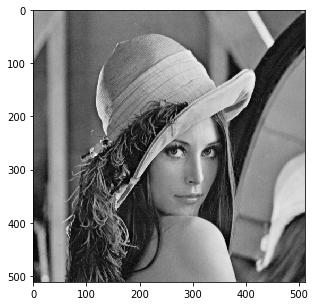

ORIGINAL SUBMATRIZ
[[84  5 -3  1  3 -1  1  0]
 [-3 -2  1  2  1  0  0  0]
 [-1 -1  1  1  1  0  0  0]
 [-1  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


ZIGZAG SUBMATRIZ FLATTEN
[84  5 -3 -1 -2 -3  1  1 -1 -1  0  0  1  2  3 -1  1  1  0  0  0  0  0  0
  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


______________________________________________________
AC IN INTEGER
{   1: [(0, 3), 5],
    2: [(0, 2), -3],
    3: [(0, 1), -1],
    4: [(0, 2), -2],
    5: [(0, 2), -3],
    6: [(0, 1), 1],
    7: [(0, 1), 1],
    8: [(0, 1), -1],
    9: [(0, 1), -1],
    12: [(2, 1), 1],
    13: [(0, 2), 2],
    14: [(0, 2), 3],
    15: [(0, 1), -1],
    16: [(0, 1), 1],
    17: [(0, 1), 1],
    24: [(6, 1), 1],
    25: [(0, 1), 1],
    27: [(1, 1), 1],
    63: [(0, 0), 0]}


valueK5
100
binaryAmplitude
0101
valueK5
01
binaryAmplitude
111
valueK5

1
[5, -3, -1, -2, -3, 1, 1, -1, -1, 0, 0, 1, 2, 3, -1, 1]
::::
000100011111011010001110001000
::::
00011111011010001110001000
Comparing...
00
... to...
00
index position
2
nrbits to read next...
2
value being analysed...
01
resulting integer...
1
[5, -3, -1, -2, -3, 1, 1, -1, -1, 0, 0, 1, 2, 3, -1, 1, 1]
::::
00011111011010001110001000
::::
1111011010001110001000
Comparing...
11
... to...
00
Comparing...
11
... to...
01
Comparing...
111
... to...
100
Comparing...
1111
... to...
1010
Comparing...
1111
... to...
1011
Comparing...
1111
... to...
1100
Comparing...
11110
... to...
11010
Comparing...
11110
... to...
11011
Comparing...
11110
... to...
11100
Comparing...
111101
... to...
111010
Comparing...
111101
... to...
111011
Comparing...
1111011
... to...
1111000
Comparing...
1111011
... to...
1111001
Comparing...
1111011
... to...
1111010
Comparing...
1111011
... to...
1111011
ADDED 6 ZEROS
[5, -3, -1, -2, -3, 1, 1, -1, -1, 0, 0, 1, 2, 3, -1, 1, 1, 0, 0, 0, 0, 0, 0]
index position
7
nrb

In [310]:
import pprint
pp = pprint.PrettyPrinter(indent=4)

def getSize(amplitude: int, positive: bool) -> (int, int):
    return amplitude, len("{0:b}".format(np.abs(amplitude)))  
    
    
print("Imagem ANTES de ser aplicada a DCT bidimensional:")
input_file = "../data/raw/Lena.tif"
plt.figure(figsize=(5,5))
image = cv2.imread(input_file, cv2.IMREAD_GRAYSCALE)*1.0
plt.imshow(image, cmap='gray')
plt.show()

#Aplicar Bloco final a imagem construindo a imagem comprimida
submatriz = codificacaoJPEG(image).astype("int")

submatriz = np.array([
                        [ 84,  5, -3,  1,  3, -1,  1,  0],
                        [ -3, -2,  1,  2,  1,  0,  0,  0],
                        [ -1, -1,  1,  1,  1,  0,  0,  0],
                        [ -1,  0,  0,  1,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0],
                        [  0,  0,  0,  0,  0,  0,  0,  0]
                                                                    ])
print("ORIGINAL SUBMATRIZ")
print(submatriz)
print("\n")
submatriz = submatriz.flatten(order='F')
submatriz = submatriz[ind_Z]
print("ZIGZAG SUBMATRIZ FLATTEN")
print(submatriz)
print("\n")

e = dict()
f = []

countzeros = 0
for i in range(1, len(submatriz) - 1):
    if submatriz[i] == 0:
        countzeros += 1
    elif submatriz[i] > 0:
        size, amplitude = getSize(submatriz[i], True)
        e[i] = [(countzeros, amplitude), size]
        countzeros = 0
    elif submatriz[i] < 0:
        size, amplitude = getSize(submatriz[i], False)
        e[i] = [(countzeros, amplitude), size]
        countzeros = 0
    e[len(submatriz) - 1] = [(0, 0), 0]

print("______________________________________________________")

print("AC IN INTEGER")
pp.pprint(e)
print("\n")

countzeros = 0
for i in range(1, len(submatriz) - 1):
    if submatriz[i] == 0:
        countzeros += 1
    elif submatriz[i] > 0:
        size, amplitude = getSize(submatriz[i], True)
        valueK5 = K5[(countzeros, amplitude)]
        binaryAmplitude = "0" + "{0:b}".format(np.abs(size))
        f += valueK5 + binaryAmplitude
        print("valueK5")
        print(valueK5)
        print("binaryAmplitude")
        print(binaryAmplitude)
        countzeros = 0
    elif submatriz[i] < 0:
        size, amplitude = getSize(submatriz[i], True)
        valueK5 = K5[(countzeros, amplitude)]
        binaryAmplitude = "1" + "{0:b}".format(np.abs(size))
        print("valueK5")
        print(valueK5)
        print("binaryAmplitude")
        print(binaryAmplitude)
        f += valueK5 + binaryAmplitude
        countzeros = 0
f += "000"   


print("______________________________________________________")

g = ""
for c in f:
    g += c
print("AC FROM BITSTREAM")
print(g)
print("\n")

dimensions = [len(v) for v in K5.values()] 
print("DIMENSIONS")
print(dimensions)
print("\n")

dict_values = list(K5.values())
print("DICT VALUES")
print(dict_values)
print("\n")

dict_keys = list(K5.keys())
print("DICT KEYS")
print(dict_keys)
print("\n")

min_size = min(map(len, dict_values))
decoded = []
print("\n")
print("dict_keys[0]")
print(dict_keys[0])
print(len(dict_keys))
print("\n")

print("AC BINARY FORMAT")
print(g)
print("\n")

def convertBackToInt(binary: str, positive: bool = True):
    if binary != "0":
        binary = binary[1:]
        backToInt = int(binary, 2)
        if not positive:
            backToInt *= -1
        return backToInt
    else:
        return 0
    
    
i = 0
j = 1
while((len(g) > 0) and i < 80):
    i +=1
    if(i in dimensions):
        for v in range(len_dict_values):
            if(len(g[:i]) == len(dict_values[v])):
                print("Comparing...")
                print(g[:i])
                print("... to...")
                print(dict_values[v])
                
                if(g[:i] == dict_values[v]):
                    zero_run_length = dict_keys[v][0]
                    if(zero_run_length != 0):
                        for h in range(zero_run_length):
                            decoded.append(0)
                        print("ADDED " + str(zero_run_length) + " ZEROS")
                        print(decoded)
                        
                    nrbits = dict_keys[v][1] + 1 #mais bit de sinal
                    print("index position")
                    print(i)
                    print("nrbits to read next...")
                    print(nrbits)
                    binaryString = g[i : i + nrbits]
                    print("value being analysed...")
                    print(binaryString)
                    if binaryString[0] != "0":
                        backToInt = convertBackToInt(binaryString, False)
                    else:
                        backToInt = convertBackToInt(binaryString, True)
                    print("resulting integer...")
                    print(backToInt)
                    decoded.append(backToInt)
                    print(decoded)
                    print("::::")
                    print(g)
                    g = g[i + nrbits:]
                    print("::::")
                    print(g)
                    j += 1
                    i = min_size-1
                    break
while(len(decoded) < 64):
    decoded.append(0)
    
    
print("AC TUPLE FORMAT")
pp.pprint(e)
print("\n")

print("DECODED BLOCK")
print(decoded)
print("\n")

print("ORIGINAL SUBMATRIZ")
submatriz = submatriz[ind_O].reshape((8,8),order='F')
print(submatriz)
print("\n")
